<a href="https://colab.research.google.com/github/walexand3r/4YP/blob/master/Fashion%20MNIST/Image%20Processing/IntensityScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scales pixel intensities of base image D, adds original image for D+

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from copy import deepcopy
from random import random


In [0]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
train = pd.read_csv('/content/drive/My Drive/4th Year/4YP/Fashion MNIST 60k/Base Images/train_base.csv',header=None).to_numpy()
test = pd.read_csv('/content/drive/My Drive/4th Year/4YP/Fashion MNIST 60k/Base Images/test_base.csv',header=None).to_numpy()
n_train = np.size(train,0)
n_test= np.size(test,0)
pixels = np.size(test,1)

In [0]:
# Creating train data

D = np.zeros([n_train,pixels])
Dplus = np.zeros([n_train,pixels])

D[:,0] = train[:,0]
Dplus[:,0] = train[:,0]

for n in range(n_train):
  # In matrix form
  image = train[n,1:]
  imD = np.reshape(image, (-1, 28))[:]
  imGT = deepcopy(imD[0:14,0:14])     # ground truth

  # Forming Dm
  scale = 1.4*random() - 0.7
  for i in range(0,14):
    for j in range(0,14):
      imD[i,j] = round(imD[i,j] * (1+scale));
      if imD[i,j] < 0:
        imD[i,j]= 0;
      if imD[i,j] > 255:
        imD[i,j] = 255;

  D[n,1:] = np.reshape(imD,(1,-1))

  # Forming Dm+
  imDplus = imD[:]
  imDplus[0:14,14:28] = imGT[:]
  Dplus[n,1:] = np.reshape(imDplus,(1,-1))

# Saving
pd.DataFrame(D).to_csv('/content/drive/My Drive/4th Year/4YP/Fashion MNIST 60k/Processed Datasets/Intensity Scaled/D_train.csv',header=None, index=None)
pd.DataFrame(Dplus).to_csv('/content/drive/My Drive/4th Year/4YP/Fashion MNIST 60k/Processed Datasets/Intensity Scaled/D+_train.csv',header=None, index=None)


In [0]:
# Creating test data

D = np.zeros([n_test,pixels])
Dplus = np.zeros([n_test,pixels])

D[:,0] = test[:,0]
Dplus[:,0] = test[:,0]

for n in range(n_test):
  # In matrix form
  image = test[n,1:]
  imD = np.reshape(image, (-1, 28))[:]
  imGT = deepcopy(imD[0:14,0:14])     # ground truth

  # Forming Dm
  scale = 1.4*random() - 0.7
  for i in range(0,14):
    for j in range(0,14):
      imD[i,j] = round(imD[i,j] * (1+scale));
      if imD[i,j] < 0:
        imD[i,j]= 0;
      if imD[i,j] > 255:
        imD[i,j] = 255;

  D[n,1:] = np.reshape(imD,(1,-1))

  # Forming Dm+
  imDplus = imD[:]
  imDplus[0:14,14:28] = imGT[:]
  Dplus[n,1:] = np.reshape(imDplus,(1,-1))

# Saving
pd.DataFrame(D).to_csv('/content/drive/My Drive/4th Year/4YP/Fashion MNIST 60k/Processed Datasets/Intensity Scaled/D_test.csv',header=None, index=None)
pd.DataFrame(Dplus).to_csv('/content/drive/My Drive/4th Year/4YP/Fashion MNIST 60k/Processed Datasets/Intensity Scaled/D+_test.csv',header=None, index=None)





In [0]:
image_set = pd.read_csv('/content/drive/My Drive/4th Year/4YP/Fashion MNIST 60k/Processed Datasets/Intensity Scaled/D+_test.csv',header=None)
# Checking images
image_set = image_set.to_numpy();

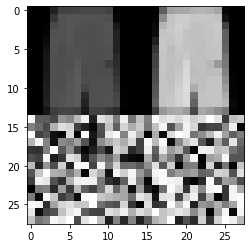

In [0]:
n = round(10000-1)
image = image_set[n,1:]
imMat = np.reshape(image, (-1, 28))
plt.imshow(imMat, cmap = 'Greys_r', interpolation='nearest')
plt.show()